In [39]:
import math
import tempfile as TemporaryDirectory
import zipfile as Zipfile
from pathlib import Path
import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm
from rdkit import Chem
from rdkit.Chem import rdmolops, Draw, AllChem, Descriptors 
from IPython.display import display, Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "data2"

targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity
type(targets_api)

chembl_webresource_client.query_set.QuerySet

In [3]:
uniprot_id = "Q06124"

targets = targets_api.get(targets_components_accession=uniprot_id).only(
    "target_chembl_id","organism", "pref_name", "target_type"
)
print(f"The type of the targets: {type(targets)}")

The type of the targets: <class 'chembl_webresource_client.query_set.QuerySet'>


In [22]:
#targets = pd.DataFrame.from_records(targets)
#targets

In [23]:
#targets[targets['pref_name'] == "Protein-tyrosine phosphatase 2C"]

In [17]:
uniprot_id = "Q06124"

targets_new = targets_api.filter(targets_components_accession=uniprot_id).only(
    "target_chembl_id","organism", "pref_name", "target_type"
)
print(f"The type of the targets: {type(targets_new)}")

The type of the targets: <class 'chembl_webresource_client.query_set.QuerySet'>


In [18]:
target_list = list(targets_new)
df =pd.DataFrame(target_list)

In [20]:
df

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Maltase-glucoamylase,CHEMBL2074,SINGLE PROTEIN
1,Homo sapiens,Sulfonylurea receptor 2,CHEMBL1971,SINGLE PROTEIN
2,Homo sapiens,Phosphodiesterase 5A,CHEMBL1827,SINGLE PROTEIN
3,Homo sapiens,Voltage-gated T-type calcium channel alpha-1H ...,CHEMBL1859,SINGLE PROTEIN
4,Ascaris suum,Nicotinic acetylcholine receptor alpha subunit,CHEMBL1884,SINGLE PROTEIN
...,...,...,...,...
15998,Homo sapiens,CDK10/Cyclin L2,CHEMBL5483186,PROTEIN COMPLEX
15999,Homo sapiens,CDK11A/Cyclin L2,CHEMBL5483187,PROTEIN COMPLEX
16000,Homo sapiens,CDK11B/Cyclin L2,CHEMBL5483188,PROTEIN COMPLEX
16001,Homo sapiens,CDK1/Cyclin E,CHEMBL5483189,PROTEIN COMPLEX GROUP


In [21]:
df[df['pref_name'] == "Protein-tyrosine phosphatase 2C"]

,organism,pref_name,target_chembl_id,target_type
1280,Homo sapiens,Protein-tyrosine phosphatase 2C,CHEMBL3864,SINGLE PROTEIN
1770,Mus musculus,Protein-tyrosine phosphatase 2C,CHEMBL2620,SINGLE PROTEIN


In [27]:
shp2 = df.iloc[1280]
chembl = shp2.target_chembl_id
print(f"The Chembl id is {chembl}")

The Chembl id is CHEMBL3864


In [28]:
bioactivities = bioactivities_api.filter(
    target_chembl_id =chembl, type="IC50",relation = "=",assay_type = "B"
).only("activity_id",
       "assay_chembl_id",
       "assay_description",
       "assay_type",
       "molecule_chembl_id",
       "type",
       "standard_units",
       "standard_value",
       "relation",
       "target_chembl_id",
       "target_organism")

print(f"the length and type of bioactivities object: {len(bioactivities), type(bioactivities)}")

the length and type of bioactivities object: (1105, <class 'chembl_webresource_client.query_set.QuerySet'>)


In [29]:
bioactivities[0]

{'activity_id': 596575,
 'assay_chembl_id': 'CHEMBL812686',
 'assay_description': 'In vitro inhibitory concentration required against Tyrosine phosphatase SHP-2 in the presence of 300 nM DTT',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL420456',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '5000.0',
 'target_chembl_id': 'CHEMBL3864',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'uM',
 'value': '5.0'}

In [30]:
bioactivities_df = pd.DataFrame.from_dict(bioactivities)
print(f"Dataframe shape:{bioactivities_df.shape}")
bioactivities_df.head()

Dataframe shape:(1105, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,596575,CHEMBL812686,In vitro inhibitory concentration required aga...,B,CHEMBL420456,=,nM,5000.0,CHEMBL3864,Homo sapiens,IC50,uM,5.0
1,613765,CHEMBL812686,In vitro inhibitory concentration required aga...,B,CHEMBL96952,=,nM,9000.0,CHEMBL3864,Homo sapiens,IC50,uM,9.0
2,627855,CHEMBL812686,In vitro inhibitory concentration required aga...,B,CHEMBL95255,=,nM,14000.0,CHEMBL3864,Homo sapiens,IC50,uM,14.0
3,688576,CHEMBL801967,Inhibitory activity against Protein tyrosine p...,B,CHEMBL140954,=,nM,16000.0,CHEMBL3864,Homo sapiens,IC50,uM,16.0
4,692358,CHEMBL801967,Inhibitory activity against Protein tyrosine p...,B,CHEMBL344437,=,nM,152000.0,CHEMBL3864,Homo sapiens,IC50,uM,152.0


In [31]:
bioactivities_df.to_csv("activity_data.csv")

In [40]:
bioactivities_df.drop(columns=['assay_type','units'],axis=1,inplace=True)
print(bioactivities_df.shape)

(1105, 11)


In [41]:
bioactivities_df['standard_value'] = bioactivities_df['standard_value'].astype('float32')

In [45]:
bioactivities_df.isnull().sum()

activity_id           0
assay_chembl_id       0
assay_description     0
molecule_chembl_id    0
relation              0
standard_units        0
standard_value        0
target_chembl_id      0
target_organism       0
type                  0
value                 0
dtype: int64

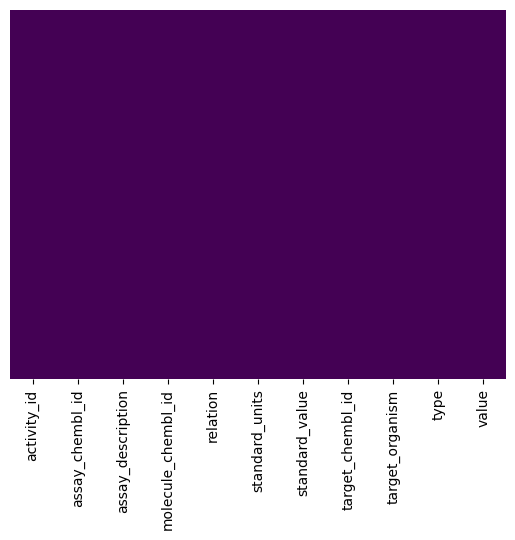

In [51]:
sns.heatmap(bioactivities_df.isnull(),cmap="viridis",cbar=False,yticklabels=False)
plt.show()

In [53]:
bioactivities_df.standard_units.value_counts()

standard_units
nM         1104
ug.mL-1       1
Name: count, dtype: int64

In [55]:
bioactivity_main = bioactivities_df[bioactivities_df['standard_units'] == "nM"]
len(bioactivity_main)

1104

In [ ]:
bioactivity_main['molecule_chembl_id'].duplicated().sum()

294

In [59]:
bioactivity_main.drop_duplicates(subset='molecule_chembl_id',keep="first",inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8464\1914405404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bioactivity_main.drop_duplicates(subset='molecule_chembl_id',keep="first",inplace=True)


In [63]:
bioactivity_main.reset_index(drop=True,inplace=True)

In [65]:
bioactivity_main.rename(columns={"standard_value":"IC50", "standard_unit":"units"},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8464\627889036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bioactivity_main.rename(columns={"standard_value":"IC50", "standard_unit":"units"},inplace=True)


In [66]:
bioactivity_main.to_csv("main_activity.csv")

In [4]:
df = pd.read_csv("main_activity.csv")
df.drop(columns="Unnamed: 0",inplace=True)

In [6]:
df.sample()

,activity_id,assay_chembl_id,assay_description,molecule_chembl_id,relation,standard_units,IC50,target_chembl_id,target_organism,type,value
298,17620833,CHEMBL3706028,Inhibition Assay: In vitro Shp2 PTP activity i...,CHEMBL3693928,=,nM,14300.0,CHEMBL3864,Homo sapiens,IC50,14300.0


In [7]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in = list(df["molecule_chembl_id"])
).only("molecule_chembl_id","molecule_structures")

In [8]:
compounds_df = list(tqdm(compounds_provider))

100%|██████████| 810/810 [00:48<00:00, 16.76it/s]


In [10]:
compounds_df = pd.DataFrame.from_records(compounds_df)
compounds_df.sample()

,molecule_chembl_id,molecule_structures
316,CHEMBL3918902,{'canonical_smiles': 'O=C(COc1ccc2cc(C(O)(C(F)...


In [11]:
compounds_df.isna().sum()

molecule_chembl_id     0
molecule_structures    2
dtype: int64

In [12]:
len(compounds_df)

810

In [13]:
compounds_df.dropna(axis=0,inplace=True)
len(compounds_df)

808

In [14]:
compounds_df['molecule_chembl_id'].duplicated().sum()

0

In [ ]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds['molecule_structures']['canonical_smiles'])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"]= canonical_smiles

,molecule_chembl_id,molecule_structures,smiles
495,CHEMBL4783825,{'canonical_smiles': 'COc1ccc(-n2cc(-c3ccc(C#N...,COc1ccc(-n2cc(-c3ccc(C#N)cc3)c3cc(-c4ccc(C(=O)...


In [20]:
compounds_df.drop(columns="molecule_structures",axis=1,inplace=True)
compounds_df[compounds_df['smiles'].isna()]

,molecule_chembl_id,smiles


In [24]:
df_merged = pd.merge(compounds_df,df[["molecule_chembl_id","IC50","standard_units"]],on="molecule_chembl_id")

In [28]:
print(df_merged.dtypes)

def convert_ic50(ic50_value):
    pic50 = round(9 - math.log10(ic50_value),3)
    return pic50

molecule_chembl_id     object
smiles                 object
IC50                  float64
standard_units         object
dtype: object


In [31]:
df_merged["pIC50"]= df_merged["IC50"].apply(convert_ic50)

In [32]:
df_merged.head()

,molecule_chembl_id,smiles,IC50,standard_units,pIC50
0,CHEMBL432519,CC1=C(O)C(=O)C=C2C1=CC=C1[C@@]2(C)CC[C@@]2(C)[...,61600.0,nM,4.210
1,CHEMBL301982,CC1=C(O)C(=O)C=C2C1=CC=C1[C@@]2(C)CC[C@@]2(C)[...,3300.0,nM,5.481
2,CHEMBL96952,Nc1nc(N)c2nc(CN3CCN(Cc4ccccc4)CC3)nnc2n1,9000.0,nM,5.046
3,CHEMBL420456,Nc1nc(N)c2nc(CN3CCN(Cc4ccc(-c5ccccc5)cc4)CC3)n...,5000.0,nM,5.301
4,CHEMBL95255,CCN(CC)Cc1nnc2nc(N)nc(N)c2n1,14000.0,nM,4.854


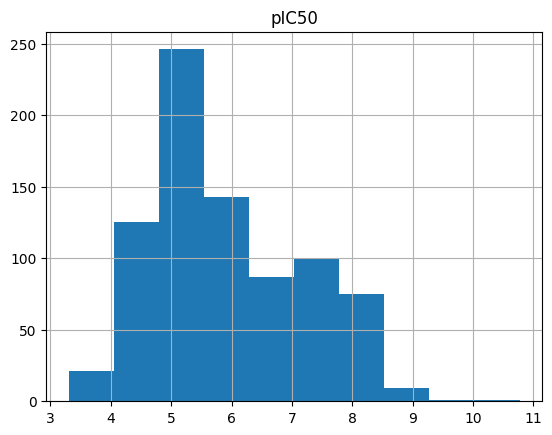

In [35]:
df_merged.hist(column="pIC50")
plt.show()

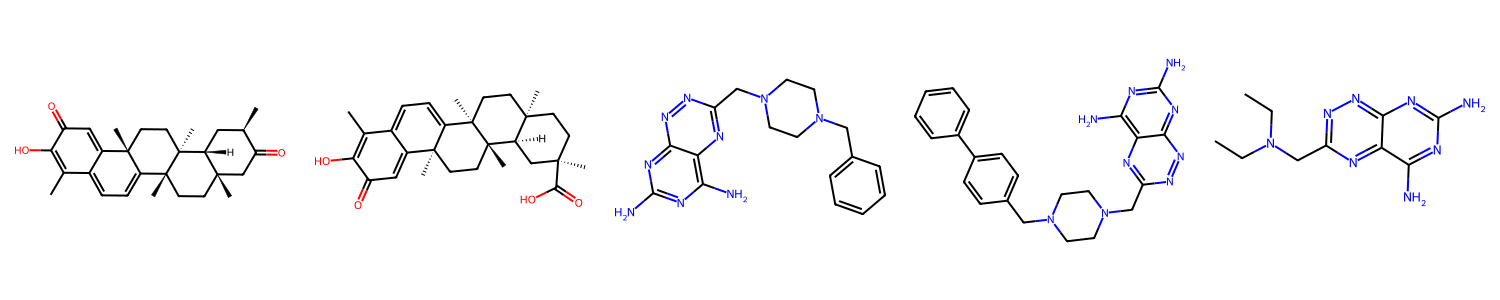

In [40]:
def show_molecules(smiles_list, n=5):
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list[:n]]
    img = Draw.MolsToImage(mols,subImgSize=(300,300))
    return img

first_five = df_merged["smiles"].head()
mol_image = show_molecules(first_five)
display(mol_image)

In [45]:
def lipinski_descriptors(smile):
    mol = Chem.MolFromSmiles(smile)
    return {
        "MW": Descriptors.ExactMolWt(mol),
        "HBA": Descriptors.NumHAcceptors(mol),
        "HBD": Descriptors.NumHDonors(mol),
        "LogP": Descriptors.MolLogP(mol),
        "TPSA": Descriptors.TPSA(mol),
        "RotBonds": Descriptors.NumRotatableBonds(mol),
    }

In [50]:
lipinski_desc = pd.DataFrame([lipinski_descriptors(smile) for smile in df_merged["smiles"]])

In [52]:
df_merged.head()

,molecule_chembl_id,smiles,IC50,standard_units,pIC50
0,CHEMBL432519,CC1=C(O)C(=O)C=C2C1=CC=C1[C@@]2(C)CC[C@@]2(C)[...,61600.0,nM,4.210
1,CHEMBL301982,CC1=C(O)C(=O)C=C2C1=CC=C1[C@@]2(C)CC[C@@]2(C)[...,3300.0,nM,5.481
2,CHEMBL96952,Nc1nc(N)c2nc(CN3CCN(Cc4ccccc4)CC3)nnc2n1,9000.0,nM,5.046
3,CHEMBL420456,Nc1nc(N)c2nc(CN3CCN(Cc4ccc(-c5ccccc5)cc4)CC3)n...,5000.0,nM,5.301
4,CHEMBL95255,CCN(CC)Cc1nnc2nc(N)nc(N)c2n1,14000.0,nM,4.854


In [53]:
def morgan_fingerprint(smile):
    mol = Chem.MolFromSmiles(smile)

    return list(AllChem.GetMorganGenerator(radius=2,fpSize=1024).GetFingerprint(mol))

valid_fps = [morgan_fingerprint(smile) for smile in df_merged['smiles']]
fp_df = pd.DataFrame(valid_fps,columns=[f'bit_{i}' for i in range(1024)])

output_df = pd.concat([df_merged,lipinski_desc,fp_df],axis=1)

In [55]:
print(output_df.shape)

(808, 1035)


In [56]:
output_df.to_csv("df_desc_main.csv",index=False)